# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preprocessing</a></div><div class="lev2 toc-item"><a href="#Load-Data" data-toc-modified-id="Load-Data-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Data</a></div><div class="lev3 toc-item"><a href="#Load-Train-Data" data-toc-modified-id="Load-Train-Data-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Load Train Data</a></div><div class="lev3 toc-item"><a href="#Load-Test-Data" data-toc-modified-id="Load-Test-Data-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Load Test Data</a></div><div class="lev3 toc-item"><a href="#Relation-Types" data-toc-modified-id="Relation-Types-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Relation Types</a></div><div class="lev2 toc-item"><a href="#Participle" data-toc-modified-id="Participle-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Participle</a></div><div class="lev2 toc-item"><a href="#Make-Adjacency-List" data-toc-modified-id="Make-Adjacency-List-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Make Adjacency List</a></div><div class="lev3 toc-item"><a href="#Make-Adjacency-List-of-Train-Data" data-toc-modified-id="Make-Adjacency-List-of-Train-Data-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Make Adjacency List of Train Data</a></div><div class="lev3 toc-item"><a href="#Make-Adjacency-List-of-Test-Data" data-toc-modified-id="Make-Adjacency-List-of-Test-Data-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Make Adjacency List of Test Data</a></div><div class="lev1 toc-item"><a href="#Word-to-Vector" data-toc-modified-id="Word-to-Vector-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Word to Vector</a></div><div class="lev2 toc-item"><a href="#Tokenize-Text" data-toc-modified-id="Tokenize-Text-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Tokenize Text</a></div><div class="lev2 toc-item"><a href="#Create-Word-Embeddings-with-GloVe" data-toc-modified-id="Create-Word-Embeddings-with-GloVe-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create Word Embeddings with GloVe</a></div><div class="lev3 toc-item"><a href="#Read-GloVe" data-toc-modified-id="Read-GloVe-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Read GloVe</a></div><div class="lev3 toc-item"><a href="#Use-Glove-to-Initialize-Embedding-Matrix" data-toc-modified-id="Use-Glove-to-Initialize-Embedding-Matrix-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Use Glove to Initialize Embedding Matrix</a></div><div class="lev1 toc-item"><a href="#Build-Dateset" data-toc-modified-id="Build-Dateset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Build Dateset</a></div><div class="lev1 toc-item"><a href="#Save-Dataset" data-toc-modified-id="Save-Dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save Dataset</a></div><div class="lev1 toc-item"><a href="#Checkpoint" data-toc-modified-id="Checkpoint-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Checkpoint</a></div><div class="lev1 toc-item"><a href="#Build-Model" data-toc-modified-id="Build-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Build Model</a></div><div class="lev2 toc-item"><a href="#Set-Hyperparameters" data-toc-modified-id="Set-Hyperparameters-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Set Hyperparameters</a></div><div class="lev2 toc-item"><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Import Libraries</a></div><div class="lev2 toc-item"><a href="#Build-Graph" data-toc-modified-id="Build-Graph-63"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Build Graph</a></div><div class="lev2 toc-item"><a href="#Model-Visualization" data-toc-modified-id="Model-Visualization-64"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Model Visualization</a></div><div class="lev2 toc-item"><a href="#Train" data-toc-modified-id="Train-65"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Train</a></div><div class="lev1 toc-item"><a href="#Evaluate" data-toc-modified-id="Evaluate-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Evaluate</a></div><div class="lev2 toc-item"><a href="#Naive-Evaluate" data-toc-modified-id="Naive-Evaluate-71"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Naive Evaluate</a></div><div class="lev2 toc-item"><a href="#Greedy-1-best-Search-Evaluate" data-toc-modified-id="Greedy-1-best-Search-Evaluate-72"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Greedy 1-best Search Evaluate</a></div><div class="lev2 toc-item"><a href="#Beam-Search-Evaluate" data-toc-modified-id="Beam-Search-Evaluate-73"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Beam Search Evaluate</a></div>

# Data Preprocessing

## Load Data

### Load Train Data

In [1]:
import json

In [2]:
sentText = []
relationMentions = []
relationLabels = []
entityMentions = []
entityLabels = []
em1Text = []
em2Text = []

with open("/Users/lizhn7/Downloads/DATA/nyt/train.json") as f:
    lines = f.readlines()

for line in lines:
    item = json.loads(line)
    # Exclude "None" label
    if not all(i['label'] == 'None' for i in item['relationMentions']):
        sentText.append(item['sentText'])
        relationMentions.append(item['relationMentions'])
        entityMentions.append(item['entityMentions'])
    
relationLabels = [[i['label'] for i in rM] for rM in relationMentions]
entityLabels = [[i['text'] for i in eM] for eM in entityMentions]
em1Text = [[i['em1Text'] for i in rM] for rM in relationMentions]
em2Text = [[i['em2Text'] for i in rM] for rM in relationMentions]

In [3]:
# Clean words
replaceDict = {
               'ā': 'a', 'á': 'a', 'ǎ': 'a', 'à': 'a',
               'ō': 'o', 'ó': 'o', 'ǒ': 'o', 'ò': 'o', 'ô': 'o', 'ö': 'o',
               'ē': 'e', 'é': 'e', 'ě': 'e', 'è': 'e', 
               'ī': 'i', 'í': 'i', 'ǐ': 'i', 'ì': 'i',
               'ū': 'u', 'ú': 'u', 'ǔ': 'u', 'ù': 'u', 'ü': 'u',
               'ñ': 'n',
               'É': 'E'
              }
em1Text = [[''.join([replaceDict.get(i, i) for i in e]) for e in eT] for eT in em1Text]
em2Text = [[''.join([replaceDict.get(i, i) for i in e]) for e in eT] for eT in em2Text]

### Load Test Data

In [4]:
t_sentText = []
t_relationMentions = []
t_relationLabels = []
t_entityMentions = []
t_entityLabels = []
t_em1Text = []
t_em2Text = []

with open("/Users/lizhn7/Downloads/DATA/nyt/test.json") as f:
    lines = f.readlines()

for line in lines:
    item = json.loads(line)
    t_sentText.append(item['sentText'])
    t_relationMentions.append(item['relationMentions'])
    t_entityMentions.append(item['entityMentions'])
    
t_relationLabels = [[i['label'] for i in rM] for rM in t_relationMentions]
t_entityLabels = [[i['text'] for i in eM] for eM in t_entityMentions]
t_em1Text = [[i['em1Text'] for i in rM] for rM in t_relationMentions]
t_em2Text = [[i['em2Text'] for i in rM] for rM in t_relationMentions]

In [5]:
# Clean words
t_replaceDict = {
               'ā': 'a', 'á': 'a', 'ǎ': 'a', 'à': 'a',
               'ō': 'o', 'ó': 'o', 'ǒ': 'o', 'ò': 'o', 'ô': 'o', 'ö': 'o',
               'ē': 'e', 'é': 'e', 'ě': 'e', 'è': 'e', 
               'ī': 'i', 'í': 'i', 'ǐ': 'i', 'ì': 'i',
               'ū': 'u', 'ú': 'u', 'ǔ': 'u', 'ù': 'u', 'ü': 'u',
               'ñ': 'n',
               'É': 'E'
              }
t_em1Text = [[''.join([t_replaceDict.get(i, i) for i in e]) for e in eT] for eT in t_em1Text]
t_em2Text = [[''.join([t_replaceDict.get(i, i) for i in e]) for e in eT] for eT in t_em2Text]
t_entityLabels = [[''.join([t_replaceDict.get(i, i) for i in e]) for e in eT] for eT in t_entityLabels]

###  Relation Types

In [6]:
relationTypes = list(set([r for rl in relationLabels for r in rl]))
relationTypes

['/people/deceased_person/place_of_death',
 '/people/person/place_of_birth',
 '/location/administrative_division/country',
 '/business/company/industry',
 '/business/company/place_founded',
 '/people/ethnicity/people',
 '/people/person/nationality',
 '/people/person/children',
 '/location/location/contains',
 '/people/person/religion',
 '/people/person/place_lived',
 '/sports/sports_team_location/teams',
 '/people/person/profession',
 '/location/country/administrative_divisions',
 '/people/person/ethnicity',
 '/business/company_shareholder/major_shareholder_of',
 '/business/company/advisors',
 '/location/country/capital',
 '/location/neighborhood/neighborhood_of',
 '/business/company/major_shareholders',
 '/people/ethnicity/geographic_distribution',
 '/business/company/founders',
 '/sports/sports_team/location',
 '/business/person/company']

In [7]:
t_relationTypes = list(set([r for rl in t_relationLabels for r in rl if r != 'None']))
t_relationTypes

['/location/country/administrative_divisions',
 '/people/deceased_person/place_of_death',
 '/location/location/contains',
 '/location/administrative_division/country',
 '/people/person/place_of_birth',
 '/location/country/capital',
 '/location/neighborhood/neighborhood_of',
 '/people/person/place_lived',
 '/business/company/founders',
 '/people/person/children',
 '/people/person/nationality',
 '/business/person/company']

## Participle

In [8]:
from nltk import regexp_tokenize

In [9]:
def cut(s):
    """
    Participle
    """
    pattern = r'''
              (?x)                   # set flag to allow verbose regexps 
              (?:[A-Z]\.)+           # abbreviations, e.g. U.S.A. 
              |\d+(?:\.\d+)?%?       # numbers, incl. currency and percentages 
              |\w+(?:[-&']\w+)*       # words w/ optional internal hyphens/apostrophe  
           '''  
    return regexp_tokenize(s, pattern=pattern)

In [10]:
filename = "stopwords_666.txt"
stopWords = {w: None for w in open(filename).read().split()}

In [11]:
sentWords = [cut(s) for s in sentText]
entlabWords = [[cut(s) for s in eL] for eL in entityLabels]
em1Words = [[cut(s) for s in eL] for eL in em1Text]
em2Words = [[cut(s) for s in eL] for eL in em2Text]
t_sentWords = [cut(s) for s in t_sentText]
t_entlabWords = [[cut(s) for s in eL] for eL in t_entityLabels]
t_em1Words = [[cut(s) for s in eL] for eL in t_em1Text]
t_em2Words = [[cut(s) for s in eL] for eL in t_em2Text]
# Clean words
t_sentWords = [[''.join([t_replaceDict.get(i, i) for i in e]) for e in eT] for eT in t_sentWords]

In [12]:
# Delete stopwords
for n in range(len(sentWords)):
    sentWords[n] = [i for i in [stopWords.get(i.lower(), i) for i in sentWords[n]] if i != None]
    entlabWords[n] = [[stopWords.get(i.lower(), i) for i in item] for item in entlabWords[n]]
    entlabWords[n] = [[i for i in item if i != None] for item in entlabWords[n]]
    em1Words[n] = [[stopWords.get(i.lower(), i) for i in item] for item in em1Words[n]]
    em1Words[n] = [[i for i in item if i != None] for item in em1Words[n]]
    em2Words[n] = [[stopWords.get(i.lower(), i) for i in item] for item in em2Words[n]]
    em2Words[n] = [[i for i in item if i != None] for item in em2Words[n]] 

for n in range(len(t_sentWords)):
    t_sentWords[n] = [i for i in [stopWords.get(i.lower(), i) for i in t_sentWords[n]] if i != None]
    t_entlabWords[n] = [[stopWords.get(i.lower(), i) for i in item] for item in t_entlabWords[n]]
    t_entlabWords[n] = [[i for i in item if i != None] for item in t_entlabWords[n]]
    t_em1Words[n] = [[stopWords.get(i.lower(), i) for i in item] for item in t_em1Words[n]]
    t_em1Words[n] = [[i for i in item if i != None] for item in t_em1Words[n]]
    t_em2Words[n] = [[stopWords.get(i.lower(), i) for i in item] for item in t_em2Words[n]]
    t_em2Words[n] = [[i for i in item if i != None] for item in t_em2Words[n]]    

In [13]:
#max([len(i) for i in t_sentWords])

In [14]:
MAX_SENT_LEN = 64
MAX_ADJL_LEN = 3

## Make Adjacency List

### Make Adjacency List of Train Data

In [15]:
from collections import Counter

In [16]:
i_entityLabels = []
for i in range(len(sentWords)):
    eL = []
    sDict = list(enumerate(sentWords[i]))
    j = 0
    for item in entlabWords[i]:
        el = []
        for e in item:
            while j < len(sDict):
                if e == sDict[j][1]:
                    el.append(sDict[j][0])
                    j += 1
                    break
                j += 1
        eL.append(el)
    i_entityLabels.append(eL)

In [17]:
rmSet = []
for item in range(len(relationMentions)):
    rms = [(em1Words[item][i][0], em2Words[item][i][0], relationLabels[item][i]) for i in range(len(relationLabels[item]))]
    rms = [' '.join(list(i)) for i in rms]
    rmSet.append(rms)
rmSet = [set(i) for i in rmSet]

In [18]:
i_adjacencyList = []
new_sentWords = []
for n in range(len(sentWords)):
    aL = []
    for l in range(len(relationLabels[n])):
        e1 = []
        e2 = []
        for item in i_entityLabels[n]:
            if ' '.join([sentWords[n][i] for i in item]) == ' '.join(em1Words[n][l]):
                e1.append(item[0])
            if ' '.join([sentWords[n][i] for i in item]) == ' '.join(em2Words[n][l]):
                e2.append(item[0])
        c1 = [(a, b) for a in e1 for b in e2 if ' '.join([sentWords[n][a], sentWords[n][b], relationLabels[n][l]]) in rmSet[n]]
        c2 = [(a, b) for a in e2 for b in e1 if ' '.join([sentWords[n][b], sentWords[n][a], relationLabels[n][l]]) in rmSet[n]]
        c = c1 + c2
        m = min([(i, abs(j[0]-j[1])) for i, j in enumerate(c)], key=lambda x: x[-1])[-1]
        r = [i[0] for i in [(i, abs(j[0]-j[1])) for i, j in enumerate(c)] if i[-1] == m]
        for i in r:
            if ' '.join([sentWords[n][c[i][0]], sentWords[n][c[i][1]], relationLabels[n][l]]) in rmSet[n]:
                al = (c[i][0], c[i][1], relationLabels[n][l])
                if al[2] in t_relationTypes and al[0] < MAX_SENT_LEN and al[1] < MAX_SENT_LEN: 
                    aL.append(al)
    #aL = [list(i) for i in set(aL)]
    if len(aL) == 1:
        i_adjacencyList.append(aL)
        new_sentWords.append(sentWords[n])
    else:
        r = [item[0] for item in enumerate(aL) if item[1][2] in ['/location/administrative_division/country', '/location/country/administrative_divisions']]
        if len(r) != 0:
            i_adjacencyList.append(aL[r[0]])
            new_sentWords.append(sentWords[n])
i_adjacencyList = [list(i[0]) if len(i) == 1 else list(i) for i in i_adjacencyList]

### Make Adjacency List of Test Data

In [19]:
ti_entityLabels = []
for i in range(len(t_sentWords)):
    eL = []
    t_sDict = list(enumerate(t_sentWords[i]))
    j = 0
    for item in t_entlabWords[i]:
        el = []
        for e in item:
            while j < len(t_sDict):
                if e == t_sDict[j][1]:
                    el.append(t_sDict[j][0])
                    j += 1
                    break
                j += 1
        eL.append(el)
    ti_entityLabels.append(eL)

In [20]:
ti_trueLables = [[i for i, j in enumerate(rl) if j != 'None'] for rl in t_relationLabels]
t_trueMentions = [[j for i, j in enumerate(rl) if j['label'] != 'None'] for rl in t_relationMentions]
ti_adjacencyList = []
for n in range(len(t_sentWords)): 
    e1 = []
    e2 = []
    aL = []
    for l in ti_trueLables[n]:
        for item in ti_entityLabels[n]:
            if ' '.join([t_sentWords[n][i] for i in item]) == ' '.join(t_em1Words[n][l]):
                e1.append(item[0])
            if ' '.join([t_sentWords[n][i] for i in item]) == ' '.join(t_em2Words[n][l]):
                e2.append(item[0])
    c = [(a, b) for a in e1 for b in e2]
    r = c[min([(i, abs(j[0]-j[1])) for i, j in enumerate(c)], key=lambda x: x[-1])[0]]
    aL = aL + [r[0], r[1], t_relationLabels[n][l]]
    ti_adjacencyList.append(aL)

# Modify 
ti_adjacencyList[26] = [18, 20, '/business/company/founders']
ti_adjacencyList[191] = [18, 19, '/location/administrative_division/country']

In [21]:
#max([max(sum(i, [])) for i in ti_entityLabels])

# Word to Vector

## Tokenize Text

In [22]:
from keras.preprocessing.text import Tokenizer
from nltk import WordNetLemmatizer

Using TensorFlow backend.


In [23]:
wnl = WordNetLemmatizer()
sentWords = [[wnl.lemmatize(t.lower()) for t in toks] for toks in new_sentWords]
t_sentWords = [[wnl.lemmatize(t.lower()) for t in toks] for toks in t_sentWords]
tok_sentWords = sentWords.copy()
tok_sentWords.extend(t_sentWords)
tokTexts = [' '.join(i) for i in tok_sentWords]

In [24]:
tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(tokTexts)
word2index = tokenizer.word_index
for i in [i for i in zip(list(range(58828, 58841)), t_relationTypes + ['/go'])]:
    word2index[i[-1]] = i[0]
index2word = {i: w for w, i in word2index.items()}
print('Found %s unique tokens.' % len(word2index))

Found 58840 unique tokens.


## Create Word Embeddings with GloVe

In [25]:
VOCAB_SIZE = 58841
EMBEDDING_SIZE = 300
SEED = 42

### Read GloVe

In [26]:
import numpy as np

In [27]:
#glove_n_symbols = !wc -l /Users/lizhn7/Downloads/DATA/Glove/glove.42B.300d.txt
#glove_n_symbols = int(glove_n_symbols[0].split()[0])
glove_n_symbols = 1917495

In [28]:
glove_index_dict = {}
glove_embedding_weights = np.empty((glove_n_symbols, EMBEDDING_SIZE))
globale_scale = 0.1
with open('/Users/lizhn7/Downloads/DATA/Glove/glove.42B.300d.txt', 'r') as fp:
    index = 0
    for l in fp:
        l = l.strip().split()
        word = l[0]
        glove_index_dict[word] = index
        glove_embedding_weights[index, :] = [float(n) for n in l[1:]]
        index += 1
glove_embedding_weights *= globale_scale

### Use Glove to Initialize Embedding Matrix

In [29]:
from nltk import PorterStemmer, LancasterStemmer

In [30]:
# Generate random embedding with same scale as glove
np.random.seed(SEED)
shape = (VOCAB_SIZE, EMBEDDING_SIZE)
scale = glove_embedding_weights.std() * np.sqrt(12) / 2 
embedding = np.random.uniform(low=-scale, high=scale, size=shape)

In [31]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [32]:
# Copy from glove weights of words that appear in index2word
count = 0 
for i in range(1, 58828):
    w = index2word[i]
    g = glove_index_dict.get(w)
    if g is None:
        w = porter.stem(w)
        g = glove_index_dict.get(w)
    if g is None:
        w = lancaster.stem(w)
        g = glove_index_dict.get(w)
    if g is not None:
        embedding[i, :] = glove_embedding_weights[g, :]
        count += 1
print('{num_tokens}-{per:.2f}% tokens in vocab found in glove and copied to embedding.'.format(num_tokens=count, per=count/float(VOCAB_SIZE)*100))

55110-93.66% tokens in vocab found in glove and copied to embedding.


In [33]:
for i in range(58828, 58841):
    item = np.random.uniform(low=-scale, high=scale, size=(EMBEDDING_SIZE,))
    item[i-58828] = 1
    embedding[i, :] = item

# Build Dateset

In [34]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [35]:
new_sentText = [' '.join(i) for i in sentWords]
sentSeq = tokenizer.texts_to_sequences(new_sentText)
sentData = pad_sequences(sentSeq, maxlen=MAX_SENT_LEN, padding='post', truncating='post')

t_new_sentText = [' '.join(i) for i in t_sentWords]
t_sentSeq = tokenizer.texts_to_sequences(t_new_sentText)
t_sentData = pad_sequences(t_sentSeq, maxlen=MAX_SENT_LEN, padding='post', truncating='post')

new_adjacencyList = [[sentWords[c][j] if i < 2 else j for i, j in enumerate(item)] for c, item in enumerate(i_adjacencyList)]
adjlText = [' '.join(i) for i in new_adjacencyList]
adjlSeq = tokenizer.texts_to_sequences(adjlText)
adjlData = pad_sequences(adjlSeq, maxlen=MAX_ADJL_LEN, padding='post', truncating='post')

newt_adjacencyList = [[t_sentWords[c][j] if i < 2 else j for i, j in enumerate(item)] for c, item in enumerate(ti_adjacencyList)]
t_adjlText = [' '.join(i) for i in newt_adjacencyList]
t_adjlSeq = tokenizer.texts_to_sequences(t_adjlText)
t_adjlData = pad_sequences(t_adjlSeq, maxlen=MAX_ADJL_LEN, padding='post', truncating='post')

[i.insert(0, '/go') for i in new_adjacencyList];
adjlText = [' '.join(i) for i in new_adjacencyList]
adjlSeq = tokenizer.texts_to_sequences(adjlText)
tfData = pad_sequences(adjlSeq, maxlen=MAX_ADJL_LEN, padding='post', truncating='post')

[i.insert(0, '/go') for i in newt_adjacencyList];
t_adjlText = [' '.join(i) for i in newt_adjacencyList]
t_adjlSeq = tokenizer.texts_to_sequences(t_adjlText)
t_tfData = pad_sequences(t_adjlSeq, maxlen=MAX_ADJL_LEN, padding='post', truncating='post')

In [49]:
# Split the data into a training set, a validation set and a test set
x_train_all = sentData
tf_train_all = tfData
y_train_all = adjlData

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.15, random_state=SEED)
tf_train, tf_val, _, _ = train_test_split(tf_train_all, tf_train_all, test_size=0.15, random_state=SEED)

x_train_all, _, y_train_all, _  = train_test_split(x_train_all, y_train_all, test_size=0., random_state=SEED)
tf_train_all, _, _, _ = train_test_split(tf_train_all, tf_train_all, test_size=0., random_state=SEED)
 
x_test = t_sentData
tf_test = t_tfData
y_test = t_adjlData

x_test, _, y_test, _ = train_test_split(x_test, y_test, test_size=0., random_state=SEED)
tf_test, _, _, _ = train_test_split(tf_test, tf_test, test_size=0., random_state=SEED)

# Save Dataset

In [50]:
import h5py
import pickle

In [51]:
fh = h5py.File('/Users/lizhn7/Downloads/DATA/nyt/experiment_5_3/allData.h5', 'w')
fh['x_train'] = x_train
fh['tf_train'] = tf_train
fh['y_train'] = y_train
fh['x_val'] = x_val
fh['tf_val'] = tf_val
fh['y_val'] = y_val
fh['x_train_all'] = x_train_all
fh['tf_train_all'] = tf_train_all
fh['y_train_all'] = y_train_all
fh['x_test'] = x_test
fh['tf_test'] = tf_test
fh['y_test'] = y_test
fh['embedding'] = embedding
fh.close()

In [52]:
with open('/Users/lizhn7/Downloads/DATA/nyt/experiment_5_3/index.pkl', 'wb') as fp:
    pickle.dump((word2index, index2word), fp, -1)

# Checkpoint

In [53]:
import h5py
import pickle

In [54]:
with h5py.File('/Users/lizhn7/Downloads/DATA/nyt/experiment_5_3/allData.h5', 'r') as fh:
    x_train = fh['x_train'][:]
    tf_train = fh['tf_train'][:]
    y_train = fh['y_train'][:]
    x_val = fh['x_val'][:]
    tf_val = fh['tf_val'][:]
    y_val = fh['y_val'][:]
    x_train_all = fh['x_train_all'][:]
    tf_train_all = fh['tf_train_all'][:]
    y_train_all = fh['y_train_all'][:]
    x_test = fh['x_test'][:]
    tf_test = fh['tf_test'][:]
    y_test = fh['y_test'][:]
    embedding = fh['embedding'][:]

In [55]:
with open('/Users/lizhn7/Downloads/DATA/nyt/experiment_5_3/index.pkl', 'rb') as fp:
    word2index, index2word = pickle.load(fp)

# Build Model

##  Set Hyperparameters

In [63]:
MAX_SENT_LEN = 64
MAX_ADJL_LEN = 3
VOCAB_SIZE = len(word2index)+1
NUM_CLASSES = VOCAB_SIZE
EMBEDDING_SIZE = 300
TF_EMBEDDING_SIZE = 300

ENC_1_RNN_SIZE = 300
ENC_2_RNN_SIZE = 150
DEC_RNN_SIZE = 150
DROPOUT_RATE = 0.5
RNN_DROPOUT_RATE = 0.2
NUM_EPOCHS = 512
BATCH_SIZE = 79
STEPS_PER_EPOCH = 20
TEST_STEPS = len(x_test)//BATCH_SIZE

VALIDATION_STEPS = 3

In [57]:
print('NUM_EPOCHS: \t\t%d' % NUM_EPOCHS)
print('STEPS_PER_EPOCH: \t%d' % STEPS_PER_EPOCH)
print('TEST_STEPS: \t\t%d' % TEST_STEPS)
print('VALIDATION_STEPS: \t%d' % VALIDATION_STEPS)
print('TRAIN_BATCHES: \t\t%d' % (NUM_EPOCHS * STEPS_PER_EPOCH))
print('NUM_BATCHES \t\t%d' % (len(x_train)//BATCH_SIZE+1))

NUM_EPOCHS: 		512
STEPS_PER_EPOCH: 	20
TEST_STEPS: 		5
VALIDATION_STEPS: 	3
TRAIN_BATCHES: 		10240
NUM_BATCHES 		499


## Import Libraries

In [58]:
from keras.layers import Input, Embedding, Dropout, Bidirectional, LSTM, RepeatVector, concatenate, TimeDistributed, Dense
from keras.models import Model
import keras.backend as K
from keras.callbacks import*
from keras.utils import to_categorical
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Build Graph

In [64]:
K.clear_session()
sequence = Input(shape=(MAX_SENT_LEN,), name='INPUT') 
emb_seq = Embedding(VOCAB_SIZE, EMBEDDING_SIZE, weights=[embedding], mask_zero=True, input_length=MAX_SENT_LEN, trainable=False, name='EMBEDDING')(sequence)
tf_seq = Input(shape=(MAX_ADJL_LEN,), name='TF_INPUT')
tf_emb = Embedding(NUM_CLASSES, TF_EMBEDDING_SIZE, weights=[embedding], mask_zero=True, input_length=MAX_ADJL_LEN, trainable=False, name='TF_EMBEDDING')(tf_seq)
blstm = Bidirectional(LSTM(ENC_1_RNN_SIZE, return_sequences=True, implementation=0, dropout=RNN_DROPOUT_RATE, recurrent_dropout=RNN_DROPOUT_RATE), merge_mode='concat', name='ENC_BLSTM_1')(emb_seq)
blstm = Dropout(DROPOUT_RATE)(blstm)
blstm = Bidirectional(LSTM(ENC_2_RNN_SIZE, return_sequences=False, implementation=0, dropout=RNN_DROPOUT_RATE, recurrent_dropout=RNN_DROPOUT_RATE), merge_mode='concat', name='ENC_BLSTM_2')(blstm)
blstm = Dropout(DROPOUT_RATE)(blstm)
context = RepeatVector(MAX_ADJL_LEN, name='CONTEXT')(blstm)
context = concatenate([context, tf_emb], axis=-1)
blstm = Bidirectional(LSTM(DEC_RNN_SIZE, return_sequences=True, implementation=0, dropout=RNN_DROPOUT_RATE, recurrent_dropout=RNN_DROPOUT_RATE, name='DEC_LSTM'), merge_mode='concat', name='DEC_BLSTM')(context)
lstm = Dropout(DROPOUT_RATE)(blstm)
output = TimeDistributed(Dense(NUM_CLASSES, activation='softmax'), name='OUTPUT')(lstm)
model = Model(inputs=[sequence, tf_seq], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

## Model Visualization

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
INPUT (InputLayer)               (None, 64)            0                                            
____________________________________________________________________________________________________
EMBEDDING (Embedding)            (None, 64, 300)       17652300    INPUT[0][0]                      
____________________________________________________________________________________________________
ENC_BLSTM_1 (Bidirectional)      (None, 64, 600)       1442400     EMBEDDING[0][0]                  
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 64, 600)       0           ENC_BLSTM_1[0][0]                
___________________________________________________________________________________________

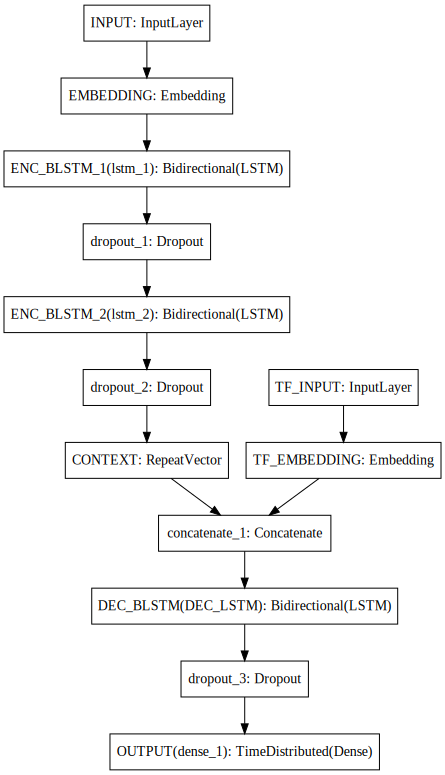

In [65]:
model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Train

In [66]:
def gen_label(s):
    """
    One-hot encoding
    """
    gen = to_categorical(s, num_classes=NUM_CLASSES)
    return gen

def data_generator_all(data, label, batch_size):
    """
    Yield batches of all data
    """
    count = 0
    while True:
        if count >= len(data[0]): 
            count = 0
        x_1 = np.zeros((batch_size, MAX_SENT_LEN))
        x_2 = np.zeros((batch_size, MAX_ADJL_LEN))
        y = np.zeros((batch_size, MAX_ADJL_LEN, NUM_CLASSES))
        for i in range(batch_size):
            n = i + count
            if n > len(data[0])-1:
                break
            x_1[i, :] = data[0][n]
            x_2[i, :] = data[1][n]
            y[i, :, :] = gen_label(label[n])
        count += batch_size
        yield ([x_1, x_2], y)
        
def data_generator(data, label, batch_size): 
    """
    Yield batches 
    """
    index = np.arange(len(data[0]))
    np.random.shuffle(index)    
    batches = [index[range(batch_size*i, min(len(data[0]), batch_size*(i+1)))] for i in range(len(data[0])//batch_size)]
    while True:
        for i in batches:
            x_1 = data[0][i]
            x_2 = data[1][i]
            y = np.array(list(map(gen_label, label[i])))
            yield ([x_1, x_2], y)

In [67]:
gen_train_all = data_generator([x_train_all, tf_train_all], y_train_all, BATCH_SIZE)
gen_test = data_generator_all([x_test, tf_test], y_test, BATCH_SIZE)
#gen_train = data_generator(x_train, y_train, BATCH_SIZE)
#gen_val = data_generator(x_val, y_val, BATCH_SIZE)

In [68]:
# Continue Trian
# filename = 'cp_logs/.hdf5'
# model.load_weights(filename)
# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [69]:
filepath = '/Users/lizhn7/Downloads/DATA/nyt/experiment_5_2/cp_logs/weights.{epoch:03d}-{val_loss:.6f}.hdf5'
log_string = '/Users/lizhn7/Downloads/DATA/nyt/experiment_5_2/tb_logs/p'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True)
tensorboard = TensorBoard(log_dir=log_string, 
                          histogram_freq=1, 
                          write_graph=False, 
                          write_grads=False, 
                          batch_size=BATCH_SIZE, 
                          write_images=True, 
                          embeddings_freq=1, 
                          embeddings_layer_names=None,
                          embeddings_metadata=None) 

In [ ]:
history = model.fit_generator(gen_train_all, 
                              steps_per_epoch=STEPS_PER_EPOCH, 
                              epochs=NUM_EPOCHS, 
                              verbose=1,
                              #callbacks=[checkpoint, tensorboard],
                              validation_data=gen_test, 
                              validation_steps=TEST_STEPS)

# Evaluate

## Naive Evaluate

In [ ]:
filename = '/Users/lizhn7/Downloads/DATA/nyt/experiment_5_3/cp_logs/weights.189-0.172831.hdf5'
model.load_weights(filename)

result = np.argmax(model.predict([x_test, tf_test], batch_size=BATCH_SIZE, verbose=1), -1)

In [ ]:
preResult = [[index2word[i] for i in sent if i != 0] for sent in result]
actResult = [[index2word[i] for i in sent if i != 0] for sent in y_test]
e1Count = sum([1 for i in range(395) if actResult[i][0] == preResult[i][0]])
e2Count = sum([1 for i in range(395) if actResult[i][1] == preResult[i][1]])
enCount = sum([1 for i in range(395) if actResult[i][0] == preResult[i][0] and actResult[i][1] == preResult[i][1]])
tripleCount = sum([1 for i in range(395) if actResult[i][0] == preResult[i][0] and actResult[i][1] == preResult[i][1] and actResult[i][2] == preResult[i][2]])
print('E1 Accuracy: \t\t%.6f' % (e1Count/395))
print('E2 Accuracy: \t\t%.6f' % (e2Count/395))
print('En Accuracy: \t\t%.6f' % (enCount/395))
print('Triple Accuracy: \t%.6f' % (tripleCount/395))

In [ ]:
for i in range(395):
    print('Predict: \t%s' % ' '.join(preResult[i]))
    print('Ground-Truth: \t%s' % ' '.join(actResult[i]))
    print('---')

## Greedy 1-best Search Evaluate

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
preResult = []
for i in range(395):
    pR = []
    tag = 0
    fb_words = np.array([58840])
    x = np.array([x_test[i]])
    
    for j in range(MAX_ADJL_LEN):
        fb_input = pad_sequences([fb_words], maxlen=MAX_ADJL_LEN, padding='post', truncating='post')
        prob = model.predict([x, fb_input], batch_size=BATCH_SIZE)[0][j]
        prob[0] = -1
        prob[tag] = -1
        if j < 2:
            prob[sentLen+1:] = -1
        if j == 2:
            prob[:65] = -1
        if j == 3:
            prob[64] = 1
        result = prob.argmax()
        tag = result
        if result == 64:
            pR.append(result)
            break
        pR.append(result)
        fb_words = np.append(fb_words, result)
    preResult.append(pR)

In [ ]:
pred = [[index2token.get(i, str(i)) for i in sent if i != 0] for sent in preResult]
actu = [[index2token.get(i, str(i)) for i in sent if i != 0] for sent in y_test]
e1Count = sum([1 for i in range(395) if actu[i][0] == pred[i][0]])
e2Count = sum([1 for i in range(395) if actu[i][1] == pred[i][1]])
enCount = sum([1 for i in range(395) if actu[i][0] == pred[i][0] and actu[i][1] == pred[i][1]])
tripleCount = sum([1 for i in range(395) if actu[i][0] == pred[i][0] and actu[i][1] == pred[i][1] and actu[i][2] == pred[i][2]])
print('E1 Accuracy: \t\t%.6f' % (e1Count/395))
print('E2 Accuracy: \t\t%.6f' % (e2Count/395))
print('En Accuracy: \t\t%.6f' % (enCount/395))
print('Triple Accuracy: \t%.6f' % (tripleCount/395))

In [ ]:
for i in range(395):
    print('Predict: \t%s' % ' '.join(pred[i]))
    print('Ground-Truth: \t%s' % ' '.join(actu[i]))
    print('---')

In [ ]:
pred = []
actu = []
for n in range(395):
    pR = [index2token.get(i, str(i)) if i > len(t_sentWords[n]) else t_sentWords[n][i-1] for i in preResult[n] if i != 0]
    aR = [index2token.get(i, str(i)) if i > len(t_sentWords[n]) else t_sentWords[n][i-1] for i in y_test[n] if i != 0]
    pred.append(pR)
    actu.append(aR)
e1Count = sum([1 for i in range(395) if actu[i][0] == pred[i][0]])
e2Count = sum([1 for i in range(395) if actu[i][1] == pred[i][1]])
enCount = sum([1 for i in range(395) if actu[i][0] == pred[i][0] and actu[i][1] == pred[i][1]])
tripleCount = sum([1 for i in range(395) if actu[i][0] == pred[i][0] and actu[i][1] == pred[i][1] and actu[i][2] == pred[i][2]])
print('E1 Accuracy: \t\t%.6f' % (e1Count/395))
print('E2 Accuracy: \t\t%.6f' % (e2Count/395))
print('En Accuracy: \t\t%.6f' % (enCount/395))
print('Triple Accuracy: \t%.6f' % (tripleCount/395))

In [ ]:
for i in range(395):
    print('Predict: \t%s' % ' '.join(pred[i]))
    print('Ground-Truth: \t%s' % ' '.join(actu[i]))
    print('---')

## Beam Search Evaluate

In [19]:
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


KeyboardInterrupt: 

In [ ]:
NUM_BEAMS = 10

In [ ]:
preResult = []
for i in range(1):
    fb_words = np.array([77])
    x = np.array([x_test[i]])
    sentLen = len(t_sentWords[i])
    
    st_words = np.array([77])
    st_input = pad_sequences([st_words], maxlen=MAX_ADJL_LEN, padding='post', truncating='post')
    prob = model.predict([x, st_input], batch_size=BATCH_SIZE)[0][0]
    prob[0] = -1
    prob[sentLen+1:] = -1
    beam = {}
    for _ in range(NUM_BEAMS):
        b = prob.argmax()
        beam[b] = float(prob[b])
        prob[b] = -1
        
    allResult = []
    for b, s in beam.items():
        pR = [b]
        fb_words = np.append(fb_words, b)
        tag = b
        for j in range(1, MAX_ADJL_LEN):
            fb_input = pad_sequences([fb_words], maxlen=MAX_ADJL_LEN, padding='post', truncating='post')
            prob = model.predict([x, fb_input], batch_size=BATCH_SIZE)[0][j]
            prob[0] = -1
            prob[tag] = -1
            if j == 1:
                prob[sentLen+1:] = -1
            if j == 2:
                prob[:65] = -1
            if j == 3:
                prob[64] = 1
            result = prob.argmax()
            beam[b] += float(prob[result])
            tag = result
            if result == 64:
                pR.append(result)
                break
            pR.append(result)
            fb_words = np.append(fb_words, result)            
        allResult.append(pR)
    pR = sum([i for i in allResult if i[0] == max(beam, key=lambda x: beam[x])], [])
    preResult.append(pR)

In [ ]:
pred = [[index2token.get(i, str(i)) for i in sent if i != 0] for sent in preResult]
actu = [[index2token.get(i, str(i)) for i in sent if i != 0] for sent in y_test]
e1Count = sum([1 for i in range(395) if actu[i][0] == pred[i][0]])
e2Count = sum([1 for i in range(395) if actu[i][1] == pred[i][1]])
enCount = sum([1 for i in range(395) if actu[i][0] == pred[i][0] and actu[i][1] == pred[i][1]])
tripleCount = sum([1 for i in range(395) if actu[i][0] == pred[i][0] and actu[i][1] == pred[i][1] and actu[i][2] == pred[i][2]])
print('E1 Accuracy: \t\t%.6f' % (e1Count/395))
print('E2 Accuracy: \t\t%.6f' % (e2Count/395))
print('En Accuracy: \t\t%.6f' % (enCount/395))
print('Triple Accuracy: \t%.6f' % (tripleCount/395))

In [ ]:
for i in range(395):
    print('Predict: \t%s' % ' '.join(pred[i]))
    print('Ground-Truth: \t%s' % ' '.join(actu[i]))
    print('---')

In [ ]:
pred = []
actu = []
for n in range(395):
    pR = [index2token.get(i, str(i)) if i > len(t_sentWords[n]) else t_sentWords[n][i-1] for i in preResult[n] if i != 0]
    aR = [index2token.get(i, str(i)) if i > len(t_sentWords[n]) else t_sentWords[n][i-1] for i in y_test[n] if i != 0]
    pred.append(pR)
    actu.append(aR)
e1Count = sum([1 for i in range(395) if actu[i][0] == pred[i][0]])
e2Count = sum([1 for i in range(395) if actu[i][1] == pred[i][1]])
enCount = sum([1 for i in range(395) if actu[i][0] == pred[i][0] and actu[i][1] == pred[i][1]])
tripleCount = sum([1 for i in range(395) if actu[i][0] == pred[i][0] and actu[i][1] == pred[i][1] and actu[i][2] == pred[i][2]])
print('E1 Accuracy: \t\t%.6f' % (e1Count/395))
print('E2 Accuracy: \t\t%.6f' % (e2Count/395))
print('En Accuracy: \t\t%.6f' % (enCount/395))
print('Triple Accuracy: \t%.6f' % (tripleCount/395))

In [ ]:
for i in range(395):
    print('Predict: \t%s' % ' '.join(pred[i]))
    print('Ground-Truth: \t%s' % ' '.join(actu[i]))
    print('---')